# Exploratory Data Analysis



In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np


In [3]:
#sbn.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [4]:
data = pd.read_csv('FB.csv')

In [5]:
data = data[['Date','Close']]
data.head()

,Date,Close
0,2017-04-24,145.470001
1,2017-04-25,146.490005
2,2017-04-26,146.559998
3,2017-04-27,147.699997
4,2017-04-28,150.250000


## 1. 5 pts Plot the data


In [6]:
data.set_index('Date', inplace = True)

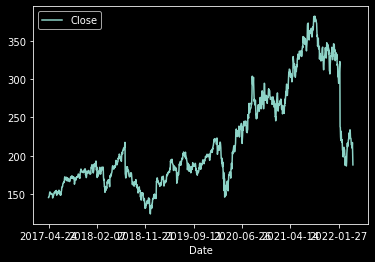

In [7]:
data.plot()
plt.show()

In [8]:
data.isnull().sum()

Close    0
dtype: int64

# Smoothing Methods



In [9]:
data = data.iloc[:,0] #Must convert to series format for drawing training and test together

In [10]:
#Convert to period index
data.index = pd.core.indexes.period.PeriodIndex(data.index.tolist(), freq='b')
data.index

PeriodIndex(['2017-04-24', '2017-04-25', '2017-04-26', '2017-04-27',
             '2017-04-28', '2017-05-01', '2017-05-02', '2017-05-03',
             '2017-05-04', '2017-05-05',
             ...
             '2022-04-07', '2022-04-08', '2022-04-11', '2022-04-12',
             '2022-04-13', '2022-04-14', '2022-04-18', '2022-04-19',
             '2022-04-20', '2022-04-21'],
            dtype='period[B]', length=1259)

In [11]:
#Splitting time series data
from sklearn.model_selection import train_test_split
y_train, y_test = train_test_split(data, test_size =0.2, shuffle=False)

In [12]:
print(len(y_train), len(y_test))

1007 252


In [13]:
from sktime.forecasting.all import ForecastingHorizon
forecasting_index = ForecastingHorizon(y_test.index, is_relative=False)
forecasting_index

ForecastingHorizon(['2021-04-23', '2021-04-26', '2021-04-27', '2021-04-28',
             '2021-04-29', '2021-04-30', '2021-05-03', '2021-05-04',
             '2021-05-05', '2021-05-06',
             ...
             '2022-04-07', '2022-04-08', '2022-04-11', '2022-04-12',
             '2022-04-13', '2022-04-14', '2022-04-18', '2022-04-19',
             '2022-04-20', '2022-04-21'],
            dtype='period[B]', length=252, is_relative=False)

## 1. Simple exponential smoothing



In [14]:
y_train

2017-04-24    145.470001
2017-04-25    146.490005
2017-04-26    146.559998
2017-04-27    147.699997
2017-04-28    150.250000
                 ...    
2021-04-16    306.179993
2021-04-19    302.239990
2021-04-20    302.649994
2021-04-21    301.470001
2021-04-22    296.519989
Freq: B, Name: Close, Length: 1007, dtype: float64

In [31]:
#Function displaying smoothing result
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sktime.performance_metrics.forecasting import MeanAbsoluteScaledError


def Smoothing_result(model_fit):
    y_pred = model_fit.forecast(252)
    plt.grid(visible=True)
    y_train.plot(color='darkviolet')
    y_pred.plot(color='cyan') 
    y_test.plot(color='purple')
    
    smape = mean_absolute_percentage_error(y_test, y_pred)
    print(f'smape: {smape}')
    mape = mean_absolute_percentage_error(y_test, y_pred, symmetric = False)
    print(f'mape: {mape}')
    mae =  MAE(y_test, y_pred)
    print(f'mae: {mae}')
    mse = MSE(y_test, y_pred)
    print(f'mse:  {mse}')
    mase = MeanAbsoluteScaledError()
    mase_result = mase(y_test, y_pred, y_train=y_train)
    print(f'MASE:  {mase_result}')

smape: 0.16114409540808056
mape: 0.17218307231866256
mae: 47.28317030884767
mse:  3056.3757850559537
MASE:  16.03343217349382


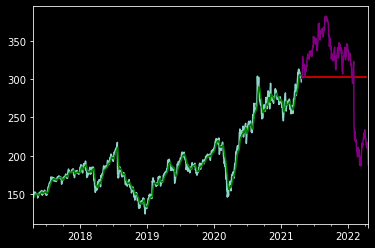

In [16]:
from statsmodels.tsa.api import SimpleExpSmoothing

fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level=0.2,optimized=False)
Smoothing_result(fit1)


## 2. Holt additive trend



smape: 0.1542475268386489
mape: 0.180544685431419
mae: 45.61202627280536
mse:  4031.4696066348806
MASE:  15.46675751147334


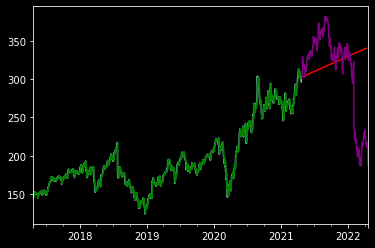

In [17]:
from statsmodels.tsa.api import ExponentialSmoothing
#from sktime.forecasting.all import ExponentialSmoothing

fit2 = ExponentialSmoothing(y_train, trend='add').fit()
Smoothing_result(fit2)




## 3.  Holt multiplicative trend




smape: 0.1542475268386489
mape: 0.180544685431419
mae: 45.61202627280536
mse:  4031.4696066348806
MASE:  15.46675751147334


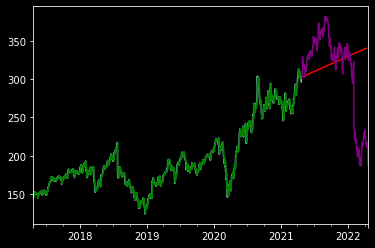

In [18]:
fit3 = ExponentialSmoothing(y_train, trend='mul').fit()
Smoothing_result(fit2)

## 4. Holt Winters additive trend and additive seasonality



smape: 0.15337197824427717
mape: 0.18010042993043127
mae: 45.35358282030186
mse:  4048.7845915872244
MASE:  15.37912092663074


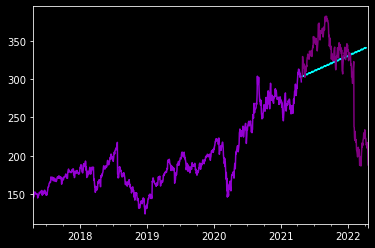

In [32]:
fit4 = ExponentialSmoothing(y_train, trend='add', seasonal_periods=12, seasonal='add').fit()
Smoothing_result(fit4)

# Best model

## 5. Holt Winters multiplicative trend and multiplicative seasonality



smape: 0.15615449458651917
mape: 0.18938385836048321
mae: 46.636235916904866
mse:  4694.569708504772
MASE:  15.8140607010193


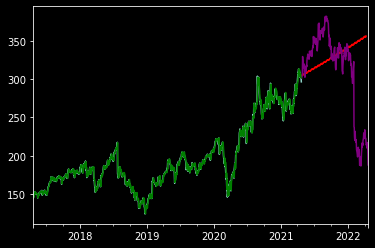

In [20]:
fit5 = ExponentialSmoothing(y_train, trend='mul', seasonal_periods=12, seasonal='mul').fit()
Smoothing_result(fit5)


## 6. Holt Winters additive damped trend


smape: 0.17146545612654138
mape: 0.17920828267875827
mae: 50.36097647292084
mse:  3187.202390987039
MASE:  17.077097309577017


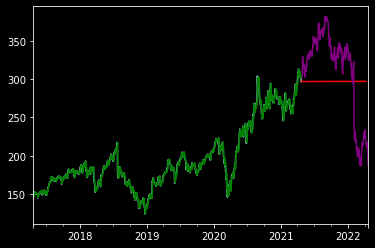

In [21]:
fit6 = ExponentialSmoothing(y_train, trend='add', damped_trend=True).fit()
Smoothing_result(fit6)



## 7. Holt Winters multiplicative damped trend

smape: 0.1716927412177802
mape: 0.1793156645221078
mae: 50.42761305198227
mse:  3188.601754829554
MASE:  17.099693363599542


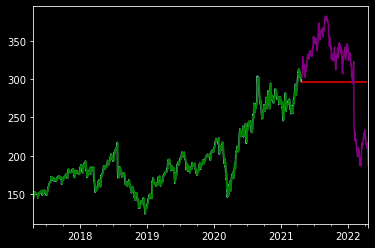

In [22]:
fit7 = ExponentialSmoothing(y_train, trend='mul', damped_trend=True).fit()
Smoothing_result(fit7)


## 8. Holt Winters multiplicative seasonality

smape: 0.1702177049394038
mape: 0.17830849165467014
mae: 49.99057488679457
mse:  3165.222833368466
MASE:  16.951496410370837


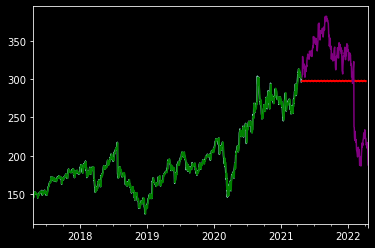

In [23]:
fit8 = ExponentialSmoothing(y_train, seasonal_periods=12, seasonal='mul').fit()
Smoothing_result(fit8)


## 9. Holt Winters Additive seasonality

smape: 0.17047208381415085
mape: 0.17848170849497283
mae: 50.06598763712464
mse:  3168.9385531463545
MASE:  16.97706841008101


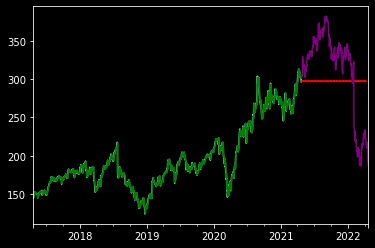

In [24]:
fit9 = ExponentialSmoothing(y_train, seasonal_periods=12, seasonal='add').fit()
Smoothing_result(fit9)

